## Problem Statement
Predicting Survival in the Titanic Data Set
We will be using a decision tree to make predictions about the Titanic data
set from Kaggle. This data set provides information on the Titanic
passengers and can be used to predict whether a passenger survived or
not.

using only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.


In [3]:
# Loading Data and modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report



In [4]:
url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [5]:
# Loding the dataset
titanic = pd.read_csv(url)

In [6]:
# Looking at first five rows of the dataset
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.columns = ['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','E mbarked']

In [8]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,E mbarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
 #checking the number of rows and columns in the dataset
titanic.shape  

(891, 12)

In [10]:
# Basic statistic details about the data
titanic.describe() `

SyntaxError: invalid syntax (<ipython-input-10-e8e4012ab935>, line 2)

In [11]:
#showing the count of NaNs
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
E mbarked        2
dtype: int64

<AxesSubplot:>

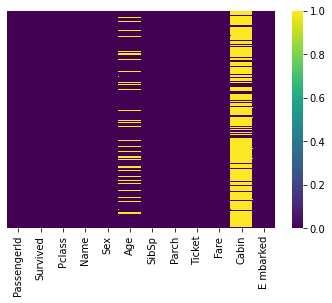

In [12]:
#seaborn has very simple solution for heatmap to show null values 
df = titanic.isnull()
sns.heatmap(df,cmap='viridis',yticklabels=False)

There are many null values in the 'Age' and 'Cabin' columns

### Feature Engineering

As cabin is irrelevant to dataset we can safely drop it

In [13]:
titanic = titanic.drop('Cabin', axis=1)

<AxesSubplot:>

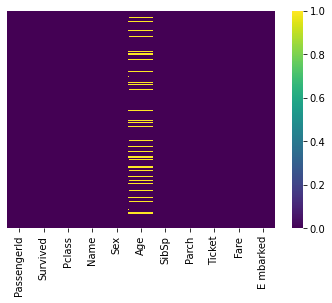

In [14]:
# checking dataset after droping the cabin column
df = titanic.isnull()
sns.heatmap(df, cmap='viridis', yticklabels=False)

We should categorize the Age Feature

In [15]:
def imputate_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age)==1:
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [16]:
titanic["Age"] = titanic[['Age','Pclass']].apply(imputate_age, axis=1)

<AxesSubplot:>

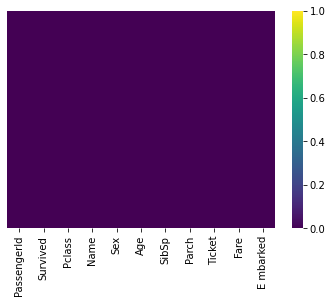

In [17]:
df = titanic.isnull()
sns.heatmap(df, cmap='viridis', yticklabels=False)

In [18]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
E mbarked      2
dtype: int64

In [19]:
titanic.dropna(inplace=True)

In [20]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Now we can see there are no 'NaN' values in the titanic dataset

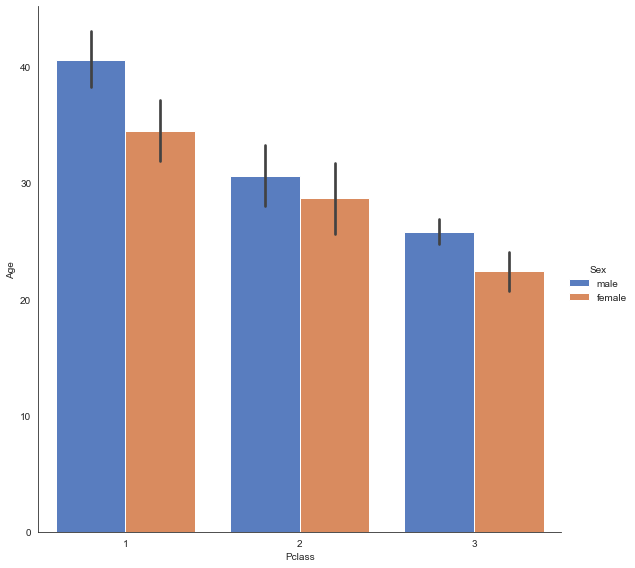

In [21]:
sns.set_style('white')
sns.catplot(x='Pclass', y='Age', data=titanic, kind='bar', height=8, palette='muted', hue='Sex')

<AxesSubplot:xlabel='Survived', ylabel='count'>

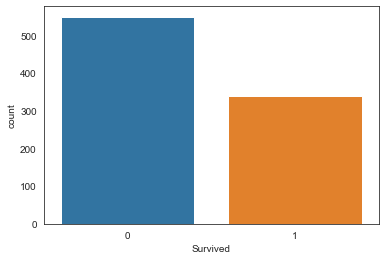

In [22]:
sns.countplot(titanic['Survived'])

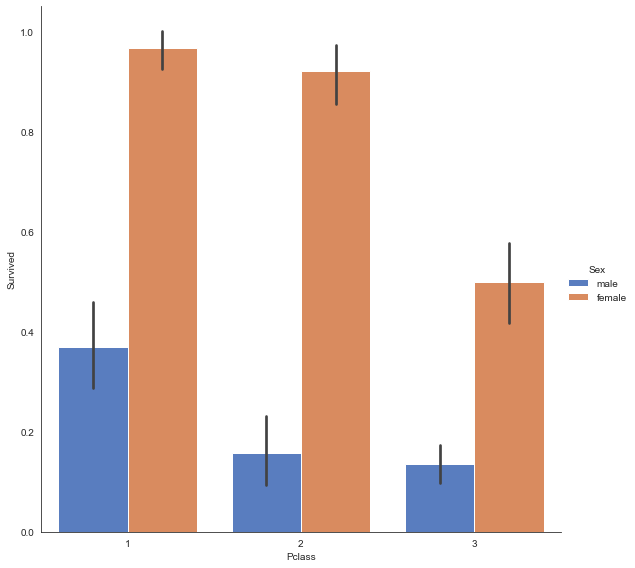

In [23]:
sns.catplot(x='Pclass', y='Survived', data=titanic, kind='bar', height=8, palette='muted', hue='Sex')

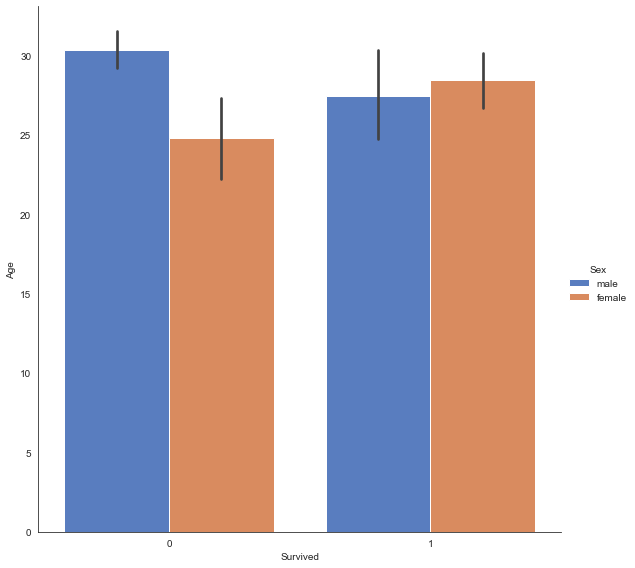

In [24]:
sns.catplot(x='Survived', y='Age', data=titanic, kind='bar', height=8, palette='muted', hue='Sex')

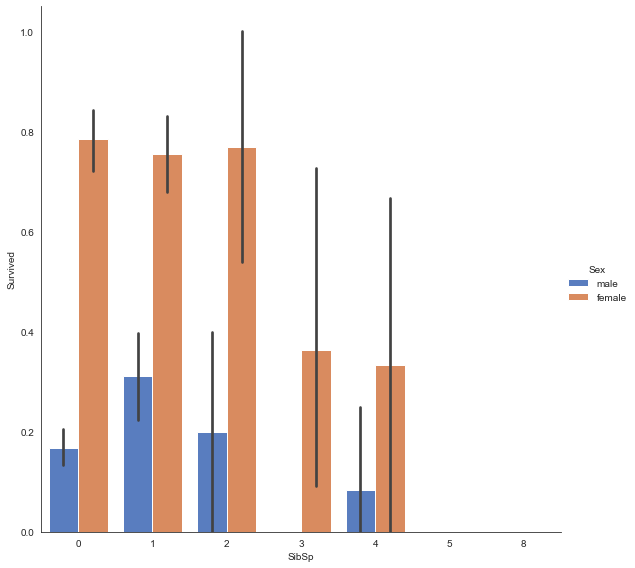

In [25]:
sns.catplot(x='SibSp',y='Survived', data=titanic, kind='bar', height=8, palette='muted', hue='Sex')

'use only pclass, Sex, Age, SibSp(Siblings aboard), Parch(Parents/children aboard), and Fare'

In [26]:
X = titanic.drop(['PassengerId', 'Survived','Name','Ticket','E mbarked'], axis=1)
y = titanic['Survived']

In [27]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    object 
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 80.9+ KB


from the above we can see that 'Sex', is object i.e categorical we need to change into numerical type

In [28]:
X['Sex'] = pd.get_dummies(X['Sex']).values

In [29]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  889 non-null    int64  
 1   Sex     889 non-null    uint8  
 2   Age     889 non-null    float64
 3   SibSp   889 non-null    int64  
 4   Parch   889 non-null    int64  
 5   Fare    889 non-null    float64
dtypes: float64(2), int64(3), uint8(1)
memory usage: 74.8 KB


In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,0,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,3,1,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,3,0,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,3,1,24.0,1,2,23.4500
889,1,0,26.0,0,0,30.0000


In [31]:
#Import train_test_split
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=101)

In [32]:
x_train.shape

(622, 6)

In [33]:
y_train.shape

(622,)

#### Applying LogistRegression

In [34]:
# Checking the model score by using logisticRegression algo.
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)
log_reg.score(x_test,y_test)

0.8239700374531835

#### Applying Decision Tree

In [35]:
# Checking the model score by using DecisionTree algo.
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_test,y_test)

0.7640449438202247

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
#let's get the prediction using the classifier we had fit above
y_pred = dtc.predict(x_test)

In [38]:
y_pred

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0], dtype=int64)

In [39]:
# Cheacking the accuracy score
Accuracy_score = accuracy_score(y_test, y_pred)
Accuracy_score

0.7640449438202247

In [40]:
# Creating the confusion matrix
con_matrix = confusion_matrix(y_test,y_pred)
con_matrix

array([[131,  32],
       [ 31,  73]], dtype=int64)

Text(0.5, 16.0, 'Predicted label')

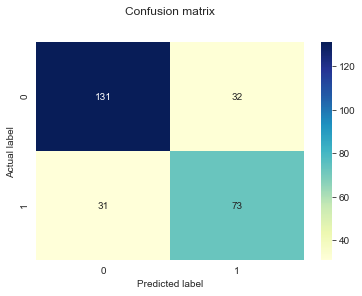

In [41]:
# Creating a heatmap for confusion matrix
p = sns.heatmap(pd.DataFrame(con_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [42]:
#Printing classification Report for the model
print(f"cf_report : {classification_report(y_test,y_pred)}")

cf_report :               precision    recall  f1-score   support

           0       0.81      0.80      0.81       163
           1       0.70      0.70      0.70       104

    accuracy                           0.76       267
   macro avg       0.75      0.75      0.75       267
weighted avg       0.76      0.76      0.76       267



### Standardizing the X column before hyper tuning

In [43]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_tranform = scalar.fit_transform(X)

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x_tranform,y, test_size=0.3, random_state=101)

### Using PCA for Model Accuracy

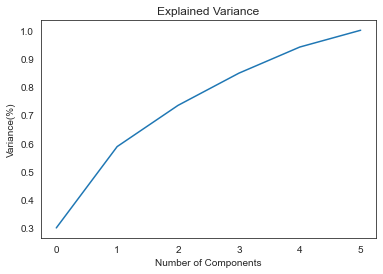

In [45]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA()
principalcomponents = pca.fit_transform(x_tranform)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance(%)') #for each component
plt.title('Explained Variance')
plt.show()

In [46]:
pca = PCA(n_components=5)
new_data = pca.fit_transform(x_tranform)

principal_x = pd.DataFrame(new_data,columns=['PC-1','PC-2','PC-3','PC-4','PC-5'])

In [47]:
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5
0,-1.149264,0.528815,0.584284,0.287556,-0.354585
1,1.842776,-0.825277,-0.758807,0.105585,-1.026249
2,-0.584450,0.333029,-1.589178,-0.065420,-0.314779
3,1.580340,-0.663821,-0.849194,0.107797,-1.039623
4,-1.206563,-0.473137,0.301970,-0.323120,0.101534
...,...,...,...,...,...
884,-0.616528,-0.645694,0.304868,0.352805,0.160746
885,0.860073,-0.411065,-1.463405,0.895568,-0.277645
886,0.708428,2.002990,-0.863876,-1.043703,0.729186
887,0.211034,-1.133769,0.410288,0.748125,0.164126


In [48]:
x_train,x_test,y_train,y_test = train_test_split(principal_x,y, test_size=0.30, random_state = 101)
from sklearn.tree import DecisionTreeClassifier
Dtc = DecisionTreeClassifier()
Dtc.fit(x_train,y_train)
Dtc.score(x_test,y_test)

0.7827715355805244

We can see there is slight increase in model accuracy score

In [50]:
# Tuning the model by hyperparameters using GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split' : range(2,10,1),
    'splitter' : ['best','random']
    
}

### Using GridsearchCv

 GridSearchCV will begin it's constructing several version of X with the grid that you just defined


In [51]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=Dtc,
                          param_grid=grid_param,
                          cv = 5,
                          n_jobs=-1)

In [52]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

### Finding Best Parameters

In [53]:
best_parameters = grid_search.best_params_
print(best_parameters)

grid_search.best_score_

{'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 6, 'min_samples_split': 5, 'splitter': 'random'}


0.7990709677419354

### Applyiing best params in Decision Tree

In [58]:
Dtc2 = DecisionTreeClassifier(criterion='gini', max_depth=12, min_samples_leaf=6, min_samples_split=5, splitter='random')
Dtc2.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=12, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [59]:
Dtc2.score(x_test,y_test)

0.7827715355805244

After Hyper parameters we can see there is increase in model accuracy

In [60]:
import pickle

with open('DTmodelForprediction.sav', 'wb') as f:
    pickle.dump(Dtc2,f)
    
with open('StandardScaler.sav', 'wb') as f:
    pickle.dump(scalar,f)
    
with open('PCAmodel.sav', 'wb') as f:
    pickle.dump(pca,f)